# Analytical solution to check VDF upwind scheme

In [1]:
from trustutils import run

run.introduction("Pierre LEDAC")

## Introduction 
 Validation made by : Pierre LEDAC



 Report generated 26/01/2022

### Description

Check analytical solution u(x,y)=v(x,y)=exp(x-y) for Navier Stokes equations using upwind scheme:

Div(u)=0 U.grad(U)=-grad(P)

Boundary conditions: Dirichlet on left/bottom, Outlet (P=0) on top/right

In [2]:
run.TRUST_parameters("1.8.3_beta")

### TRUST parameters 
 * Version TRUST: 1.8.3_beta
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Convection_VDF/build)

In [3]:
from trustutils import run 
run.reset()
c1 = run.addCase(".","test0.data",nbProcs=1)
c2 = run.addCase(".","test1.data",nbProcs=1)
c3 = run.addCase(".","test2.data",nbProcs=1)
run.printCases()
run.runCases()

### Test cases 
* ./test0.data : 
* ./test1.data : 
* ./test2.data : 


Running **with Sserver**...
  => A total of 3 cases were (successfully) run in 2.5s.


In [4]:
run.executeScript("extract_convergence")

## Meshes and analytical solution

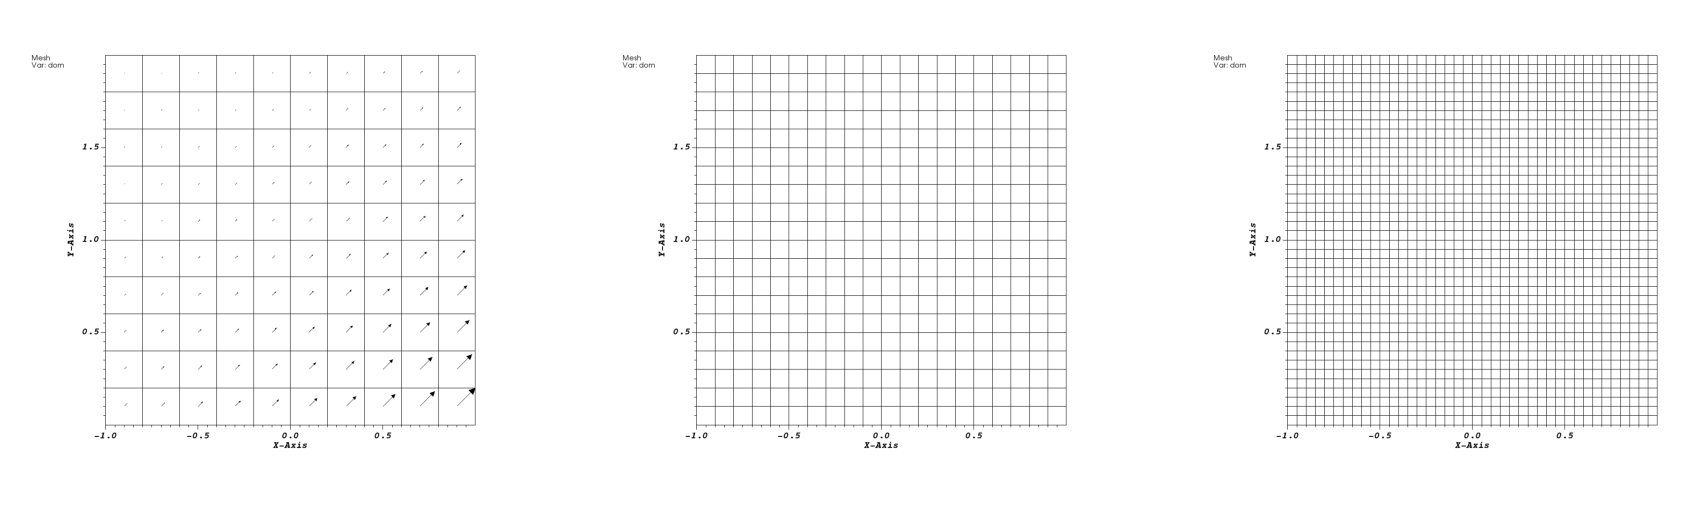

In [5]:
from trustutils import visit

fig=visit.Show("test0.lata","Vector","SOLUTION_ELEM_dom",nY=3)
fig.blackVector()
fig.visuOptions(['no_databaseinfo'])
fig.add("test1.lata","Mesh","dom",1)
fig.visuOptions(['no_databaseinfo'])
fig.add("test2.lata","Mesh","dom",2)
fig.visuOptions(['no_databaseinfo'])


fig.plot()

## Mesh convergence on Y velocity

### Residual

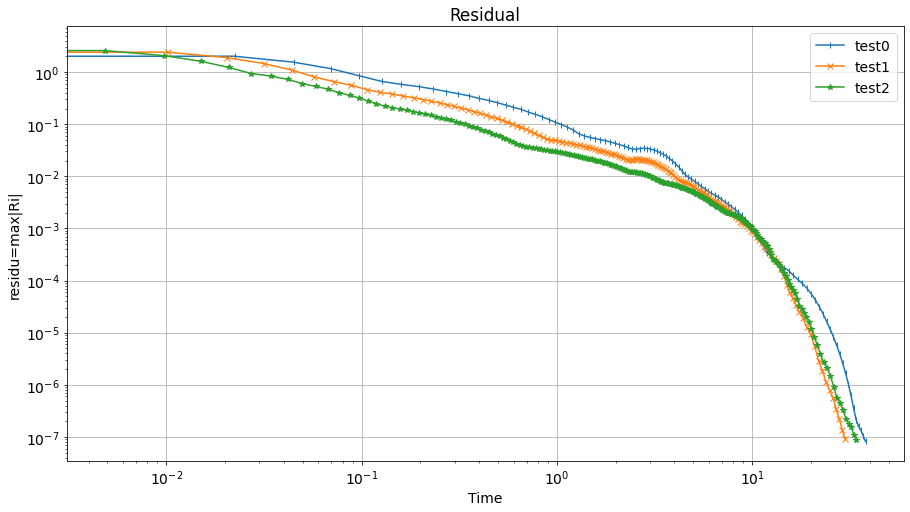

In [6]:
from trustutils import plot 

a=plot.Graph("Residual",size=[15,8])
a.addResidu('test0.dt_ev',marker='-|')
a.addResidu('test1.dt_ev',marker='-x')
a.addResidu('test2.dt_ev',marker='-*')
a.scale(xscale='log',yscale='log')

a.visu()

### Profile at Y = 0

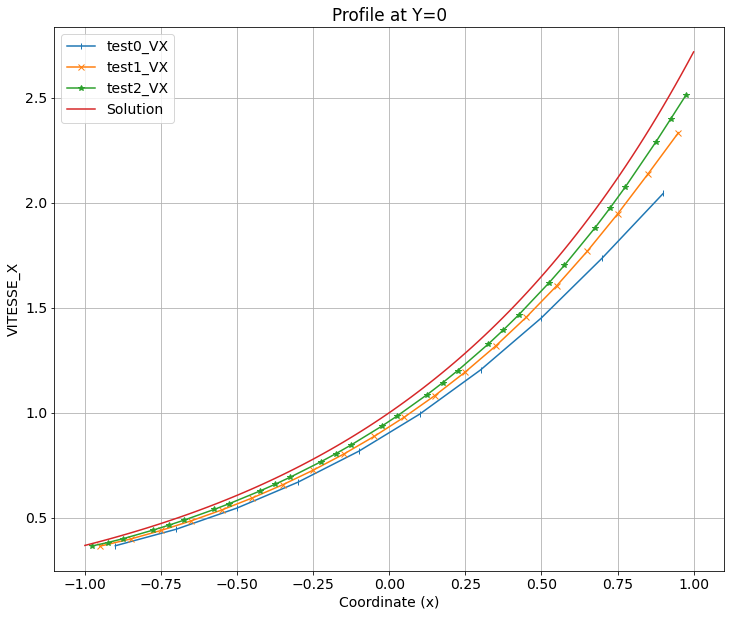

In [7]:
from trustutils import plot 

import numpy as np
import math

a = plot.Graph("Profile at Y=0")

a.addSegment("test0_VX.son",marker="-|",var="x")  
a.addSegment("test1_VX.son",marker="-x",var='x')  
a.addSegment("test2_VX.son",marker="-*",var='x')

x=np.linspace(-1,1,100)
y=np.exp(x)
a.add(x,y,label="Solution")

a.visu()

### Max error order

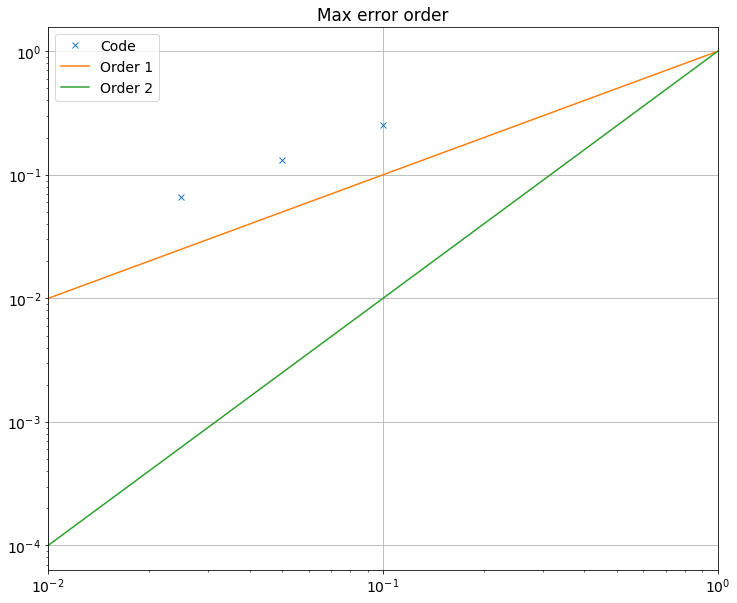

In [8]:
import math

c0 = plot.loadText("test0.conv")
c1 = plot.loadText("test1.conv")
c2 = plot.loadText("test2.conv")

x =[0]*3
y =[0]*3

x[0] = 1./math.sqrt(c0[1])
y[0] = c0[0]
x[1] = 1./math.sqrt(c1[1])
y[1] = c1[0]
x[2] = 1./math.sqrt(c2[1])
y[2] = c2[0]

a = plot.Graph("Max error order")
a.add(x,y,marker='x',label='Code')

x = np.linspace(0.01,1,100)
y = x
a.add(x,y,label='Order 1')

y = x*x
a.add(x,y,label='Order 2')
a.scale('log','log')
a.visu(0.01,1)


## Max error

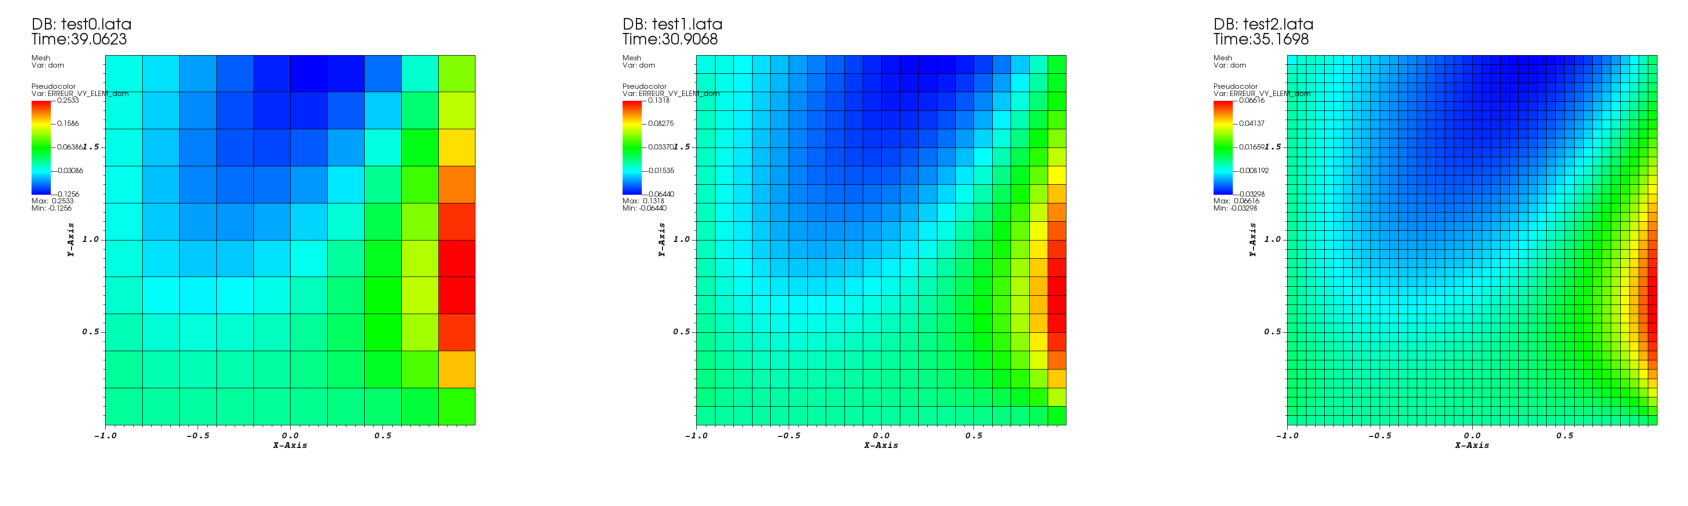

In [9]:
from trustutils import visit

fig=visit.Show("test0.lata","Pseudocolor","ERREUR_VY_ELEM_dom",nY=3)
fig.add("test1.lata","Pseudocolor","ERREUR_VY_ELEM_dom",1)
fig.add("test2.lata","Pseudocolor","ERREUR_VY_ELEM_dom",2)

fig.plot()

## Conclusion

We notice the **first order** variation of upwind scheme. 

Nevertheless, an oddity appears near the right-bottom corner where Dirichlet switches to Neuman boundary condition.
This oddity, also detected for the VDF quick scheme but not seen for VEF discretization, leads to an higher level of error there.

This error level is reduced when the analytical solution is applied as a Dirichlet condition on **all** the boundaries.

## Computer Performance

In [10]:
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
./test0,is244522,Linux,0.475998,0.00411246,100
./test1,is244522,Linux,0.766029,0.00459172,400
./test2,is244522,Linux,1.900270,0.00749842,1600
Total,,,3.142297,,
